In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [2]:
import numpy as np
import pandas as pd

def create_ever_married(age):
    if 25 <= age <= 35:
        return np.random.choice(["yes", "no"], p=[0.2, 0.8])
    elif 35 < age <= 45:
        return np.random.choice(["yes", "no"], p=[0.45, 0.55])
    elif 45 < age <= 55:
        return np.random.choice(["yes", "no"], p=[0.6, 0.4])
    else:
        return np.random.choice(["yes", "no"], p=[0.85, 0.15])

professions = ['Engineer', 'Doctor', 'Lawyer', 'Teacher', 'Entertainment', 'Executive']
def create_profession(row):
    gender = row["gender"]
    ever_married = row["ever_married"]
    if gender == "female":
        if ever_married == "yes":
            return np.random.choice(['Engineer', 'Doctor', 'Lawyer', 'Teacher', 'Entertainment', 'Executive'],
                                    p=[0.1, 0.1, 0.15, 0.3, 0.25, 0.1])
        else:
            return np.random.choice(['Engineer', 'Doctor', 'Lawyer', 'Teacher', 'Entertainment', 'Executive'],
                                    p=[0.1, 0.1, 0.1, 0.35, 0.3, 0.05])
    else:
        if ever_married == "yes":
            return np.random.choice(['Engineer', 'Doctor', 'Lawyer', 'Teacher', 'Entertainment', 'Executive'],
                                    p=[0.1, 0.1, 0.1, 0.3, 0.25, 0.15])
        else:
            return np.random.choice(['Engineer', 'Doctor', 'Lawyer', 'Teacher', 'Entertainment', 'Executive'],
                                    p=[0.1, 0.1, 0.1, 0.35, 0.3, 0.05])


def create_work_experience(row):
    age = row["age"]
    gender = row["gender"]
    profession = row["profession"]
    base_experience = age // 4
    if gender == "female":
        base_experience += np.random.normal(loc=0.5, scale=0.5)
    else:
        base_experience += np.random.normal(loc=1, scale=0.5)
    
    # Ajustando la experiencia basada en la profesión
    if profession == "Engineer":
        base_experience += np.random.normal(loc=3, scale=0.25)
    elif profession == "Doctor":
        base_experience += np.random.normal(loc=2, scale=0.25)
    elif profession == "Lawyer":
        base_experience += np.random.normal(loc=2, scale=0.25)
    elif profession == "Teacher":
        base_experience += np.random.normal(loc=3, scale=0.25)
    elif profession == "Entertainment":
        base_experience += np.random.normal(loc=1, scale=0.25)
    elif profession == "Executive":
        base_experience += np.random.normal(loc=2, scale=0.25)
    
    return max(min(base_experience, age-16), 0)  # Asegurando que la experiencia no sea mayor que la edad

def create_salary(row):
    work_experience = row["work_experience"]
    age = row["age"]
    profession = row["profession"]
    gender = row["gender"]
    ever_married = row["ever_married"]
    
    # Ajustando el salario basado en la edad y profesión
    if profession == "Engineer":
        base_salary = 25000 + 500*work_experience + 200*age - age**2 + np.random.normal(loc=0, scale=20000)
        salary = np.random.normal(loc=base_salary, scale=4000)
        salary += np.random.normal(loc=8000, scale=3000)
    elif profession == "Doctor":
        base_salary = 25000 + 300*work_experience + 100*age - age**2 + np.random.normal(loc=0, scale=12000)
        salary = np.random.normal(loc=base_salary, scale=4000)
        salary += np.random.normal(loc=15000, scale=6000)
    elif profession == "Lawyer":
        base_salary = 25000 + 600*work_experience + 100*age - age**2 + np.random.normal(loc=0, scale=20000)
        salary = np.random.normal(loc=base_salary, scale=4000)
        salary += np.random.normal(loc=6000, scale=3000)
        salary += np.random.choice([0, 20000], p=[0.6, 0.4])
        if np.random.rand() < 0.3:
            salary += np.random.normal(loc=50000, scale=30000)
    elif profession == "Teacher":
        base_salary = 25000 + 100*work_experience + 100*age - age**2 + np.random.normal(loc=0, scale=8000)
        salary = np.random.normal(loc=base_salary, scale=4000)
        salary += np.random.normal(loc=3250, scale=1500)
    elif profession == "Entertainment":
        base_salary = 25000 + 50*work_experience + 10*age - age**2 + np.random.normal(loc=0, scale=25000)
        salary = np.random.normal(loc=base_salary, scale=5000)
        salary += np.random.normal(loc=500, scale=5000)
        salary += np.random.choice([0, 40000], p=[0.9, 0.1])
    elif profession == "Executive":
        base_salary = 30000 + 700*work_experience + 200*age - age**2 + np.random.normal(loc=0, scale=20000)
        salary = np.random.normal(loc=base_salary, scale=4000)
        salary += np.random.normal(loc=13000, scale=5000)
        salary += np.random.choice([0, 30000], p=[0.7, 0.3])
        if np.random.rand() < 0.4:
            salary += np.random.normal(loc=70000, scale=35000)
    
    # Ajustando el salario basado en el género y el estado civil
    if gender == "female":
        salary += np.random.normal(loc=0, scale=3000)
    else:
        salary += np.random.normal(loc=0, scale=6000)
    
    if ever_married == "yes":
        salary += np.random.normal(loc=0, scale=2000)
    else:
        salary += np.random.normal(loc=500, scale=3000)
    
    # Introducir la relación entre edad y salario
    if np.random.rand() < 0.2 and age >= 30:
        salary += np.random.normal(loc=500*(age-30)/10, scale=4000)
    
    return max(salary, 15080)

def create_graduated(row):
    work_experience = row["work_experience"]
    age = row["age"]
    profession = row["profession"]
    gender = row["gender"]
    ever_married = row["ever_married"]
    # Probabilidad base de graduarse
    graduation_probability = 0.1
    # Ajustar la probabilidad basada en la edad y la experiencia laboral
    if age >= 30:
        graduation_probability += 0.1
    
    # Ajustar la probabilidad basada en la profesión
    if profession in ['Doctor', "Teacher"]:
        graduation_probability += 0.3
    elif profession in ["Lawyer", "Executive"]:
        graduation_probability += 0.2
    else:
        graduation_probability += 0.05

    
    # Simular si la persona se ha graduado o no
    graduated = np.random.choice([True, False], p=[graduation_probability, 1-graduation_probability])
    
    return graduated

def create_family_size(row):
    return max(1, int(np.random.normal(loc=4, scale=2)))

def create_spending_score(row):
    salary = row["salary"]
    gender = row["gender"]
    profession = row["profession"]
    age = row["age"]
    ever_married = row["ever_married"]
    graduated = row["doctorated"]
    family_size = row["family_size"]

    # Factor base basado en el salario
    score = min(100, max(1, np.random.normal(loc=salary/1000-5, scale=15)))
    
    # Ajustes basados en el género
    if gender == "male":
        score += np.random.normal(loc=5, scale=2)
    else:
        score += np.random.normal(loc=3, scale=1)
    
    # Ajustes basados en la profesión
    if profession in ["Executive", "Doctor", "Lawyer"]:
        score += np.random.normal(loc=6, scale=2)
    else:
        score += np.random.normal(loc=2, scale=1)
    
    # Ajustes basados en la edad
    if age < 30:
        score += np.random.normal(loc=1, scale=2)
    elif 30 <= age <= 50:
        score += np.random.normal(loc=2, scale=2)
    else:
        score += np.random.normal(loc=3, scale=2)
    
    # Ajustes basados en el estado civil y educación
    if ever_married == "yes":
        score += np.random.normal(loc=3, scale=2)
    if graduated:
        score += np.random.normal(loc=0, scale=1)
    
    if family_size > 5:
        score += np.random.normal(loc=7, scale=1)
    
    score = min(100, max(1, score))

    if score <= 40:
        return "low"
    elif score <= 70:
        return "medium"
    else:
        return "high"

def generate_data(num_samples):
    df = pd.DataFrame()
    df["gender"] = pd.Series(np.random.choice(["male", "female"], size=num_samples, p=[0.62, (1 - 0.62)]))
    # Generar edades con más personas mayores de 35
    df["age"] = np.random.normal(loc=45, scale=10, size=num_samples).astype(int)
    df["age"] = df["age"].apply(lambda x: max(25, min(64, x)))  # Asegurar que las edades estén dentro del rango deseado
    df["ever_married"] = df["age"].apply(create_ever_married)
    df["profession"] = df[["gender", "ever_married"]].apply(create_profession, axis=1)
    df["work_experience"] = df.apply(create_work_experience, axis=1).astype(int)
    df["salary"] = df.apply(create_salary, axis=1).astype(int)
    df["doctorated"] = df.apply(create_graduated, axis=1)
    df["family_size"] = df.apply(create_family_size, axis=1)
    df["spending_score"] = df.apply(create_spending_score, axis=1)
    return df

data = generate_data(10000)
data

,gender,age,ever_married,profession,work_experience,salary,doctorated,family_size,spending_score
0,male,54,yes,Teacher,16,40537,False,4,medium
1,male,40,no,Lawyer,13,61550,False,1,high
2,female,46,no,Entertainment,12,15080,False,5,low
3,female,44,yes,Entertainment,13,18737,False,5,low
4,male,47,yes,Executive,14,220759,False,2,high
...,...,...,...,...,...,...,...,...,...
9995,male,54,yes,Engineer,17,36357,False,5,low
9996,male,58,yes,Entertainment,17,15080,False,4,low
9997,male,40,no,Engineer,14,15080,False,5,low
9998,male,64,yes,Entertainment,18,45162,True,5,low


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10000.0,44.4930,9.574712,25.0,38.0,45.0,51.0,64.0
work_experience,10000.0,13.2053,2.642395,5.0,11.0,13.0,15.0,21.0
salary,10000.0,45358.8129,30441.251488,15080.0,25668.5,37992.0,55012.0,255614.0
family_size,10000.0,3.6101,1.867626,1.0,2.0,4.0,5.0,11.0


<Axes: xlabel='work_experience', ylabel='salary'>

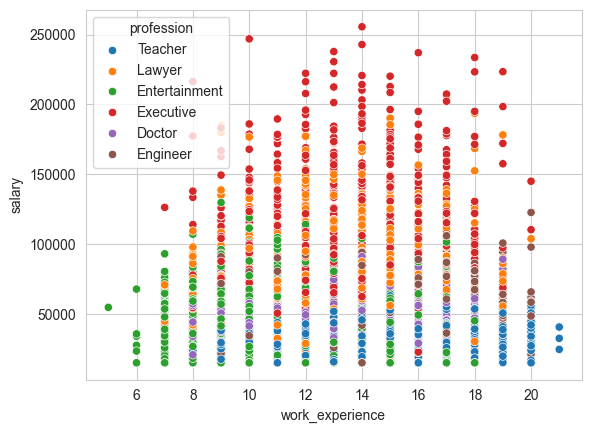

In [4]:
sns.scatterplot(x=data["work_experience"], y=data["salary"], hue=data["profession"])

In [5]:
data['profession'].value_counts()

profession
Teacher          3293
Entertainment    2793
Lawyer           1091
Engineer          988
Doctor            969
Executive         866
Name: count, dtype: int64

<Axes: ylabel='salary'>

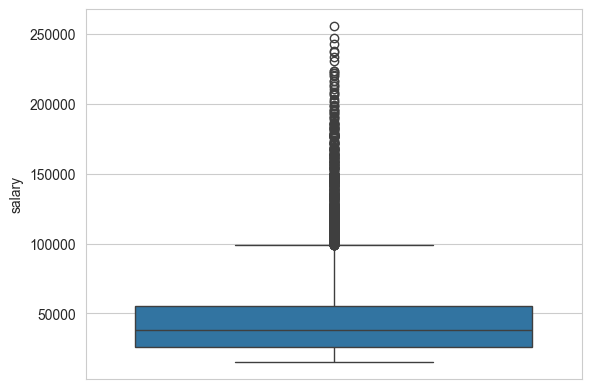

In [6]:
sns.boxplot(data["salary"])

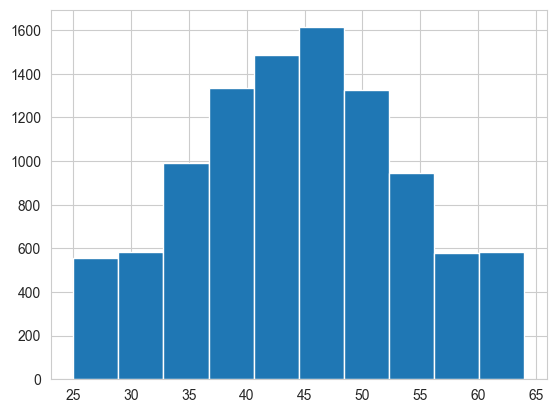

In [7]:
plt.hist(data['age']);

In [8]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
kmeans = KMeans(n_clusters=3).fit((pd.get_dummies(data)))
clusters = kmeans.predict((pd.get_dummies(data)))
data["cluster"] = clusters

In [9]:
data.groupby("cluster")["profession"].value_counts(normalize=True)

cluster  profession   
0        Executive        0.616788
         Lawyer           0.313869
         Entertainment    0.060219
         Engineer         0.009124
1        Teacher          0.461264
         Entertainment    0.315618
         Engineer         0.076232
         Doctor           0.072358
         Lawyer           0.056244
         Executive        0.018283
2        Entertainment    0.241161
         Lawyer           0.185457
         Doctor           0.167445
         Engineer         0.163776
         Executive        0.136758
         Teacher          0.105404
Name: proportion, dtype: float64

In [10]:
data.groupby("cluster").describe().T

cluster                            0             1              2
age             count     548.000000   6454.000000    2998.000000
                mean       46.284672     44.091571      45.029686
                std         9.427060      9.551973       9.589721
                min        25.000000     25.000000      25.000000
                25%        40.000000     37.000000      38.000000
                50%        46.000000     44.000000      45.000000
                75%        53.000000     51.000000      52.000000
                max        64.000000     64.000000      64.000000
work_experience count     548.000000   6454.000000    2998.000000
                mean       13.448905     13.182677      13.209473
                std         2.519964      2.637557       2.673069
                min         7.000000      6.000000       5.000000
                25%        12.000000     11.000000      11.000000
                50%        13.000000     13.000000      13.000000
                75%        15.000000     15.000000      15.000000
                max        20.000000     21.000000      20.000000
salary          count     548.000000   6454.000000    2998.000000
                mean   138483.554745  28864.702975   63844.679119
                std     30782.880968   9869.696208   13984.696928
                min    101414.000000  15080.000000   46415.000000
                25%    114031.000000  19669.500000   52191.250000
                50%    131481.000000  29388.500000   60179.500000
                75%    155873.750000  37269.500000   72912.250000
                max    255614.000000  46345.000000  101160.000000
family_size     count     548.000000   6454.000000    2998.000000
                mean        3.677007      3.598544       3.622748
                std         1.932986      1.849809       1.893769
                min         1.000000      1.000000       1.000000
                25%         2.000000      2.000000       2.000000
                50%         4.000000      4.000000       3.000000
                75%         5.000000      5.000000       5.000000
                max         9.000000     11.000000      10.000000

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score
X = pd.get_dummies(data.drop("salary", axis="columns"))
y = data["salary"]
lin_reg = RandomForestRegressor().fit(X, y)
y_pred = lin_reg.predict(X)
mean_absolute_percentage_error(y_pred=y_pred, y_true=y)*100, r2_score(y_pred=y_pred, y_true=y)

(10.56118731226537, 0.9696417938377994)

**RANDOM FOREST**

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X = data.drop(columns=['spending_score'])
y = data['spending_score']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6765
